## Using Environmental Variables in Docker and AWS ECS
This notebook shows the usage and how to set up environmental variables in docker run and AWS ECS

The following is a simple Dockerfile:

<font color='blue'>
FROM ubuntu:18.10 
    
LABEL maintainer="Yuan Huang <huangyuan2000@hotmail.com>" \   
      version="1.0"      
RUN apt-get update -y && apt-get install -y wget && \   
    apt-get install -y lftp && \   
    apt-get clean && rm -rf /var/cache/apt/archives/* /var/lib/apt/lists/*       
USER root   
WORKDIR /   
COPY run.sh /   
RUN chmod 755 /run.sh   
ENTRYPOINT ["/run.sh"]   
CMD []

</font>

This dockerfile is based on ubuntu version 18.10, and contains some basic packages for downloading files. It also copies the entrypoint shell script file, which is run.sh to the docker image. When users execute the docker run command, the run.sh will be executed.

Now, let's see the code of run.sh:

<font color=blue>
#!/bin/bash

echo $env_test
</blue>

The code is very simple. The script prints out the value of an environment varialbe, env_test to the screen. In addition, we need to define and transfer this env_test environment variable to docker container when the container is set up to run by the docker run command. 

Actually, we can use the following command:

docker run <font color=blue>udocker</font> -e env_test="hello world" (here <font color=blue>udocker</font> is the docker image)

Here the environment varialbe env_test is given the value of "hello world". When the command is run, we can see the value of "hello world" is printed out on the screen by run.sh script. This means that the env_test environment variable has been successfully set and transferred to the docker container instance

### AWS ECR   
The following are the aws and docker cli commands to register the docker repository and docker image to AWS, and set up the ECS task definition to run the docker.

1. <font color=blue>aws ecr get-login --region us-east-2 --no-include-email</font>
2. <font color=blue>copy and paste the output from this command</font>

3. <font color=blue>aws ecr create-repository --repository-name sra_rna_tool</font>

The output of the aws ecr create-repository is: <font color=blue>
{   
    "repository": {   
        "repositoryArn": "arn:aws:ecr:us-east-1:098240359427:repository/sra_rna_tools",   
        "registryId": "098240359427",   
        "repositoryName": "sra_rna_tools",   
        "repositoryUri": "098240359427.dkr.ecr.us-east-1.amazonaws.com/sra_rna_tools",   
        "createdAt": 1558838421.0   
    }   
}   
    </font>
4. tag the docker image on the local machine to aws respositoryUri. The following command line is used:      
   <font color=blue>docker tag udocker:latest 098240359427.dkr.ecr.us-east-1.amazonaws.com/sra_rna_tools</font>
5. push the tagged docker image to AWS ECR using the following command line:       
   <font color=blue>docker push 098240359427.dkr.ecr.us-east-1.amazonaws.com/sra_rna_tools</font>
6. in AWS ECS console, define the image, and define the envorinment variable env_test="good morning" in environment section.  
7. run the ECS and in the log section, you should see "good morning" in the message. The results were obtained using Fargate.

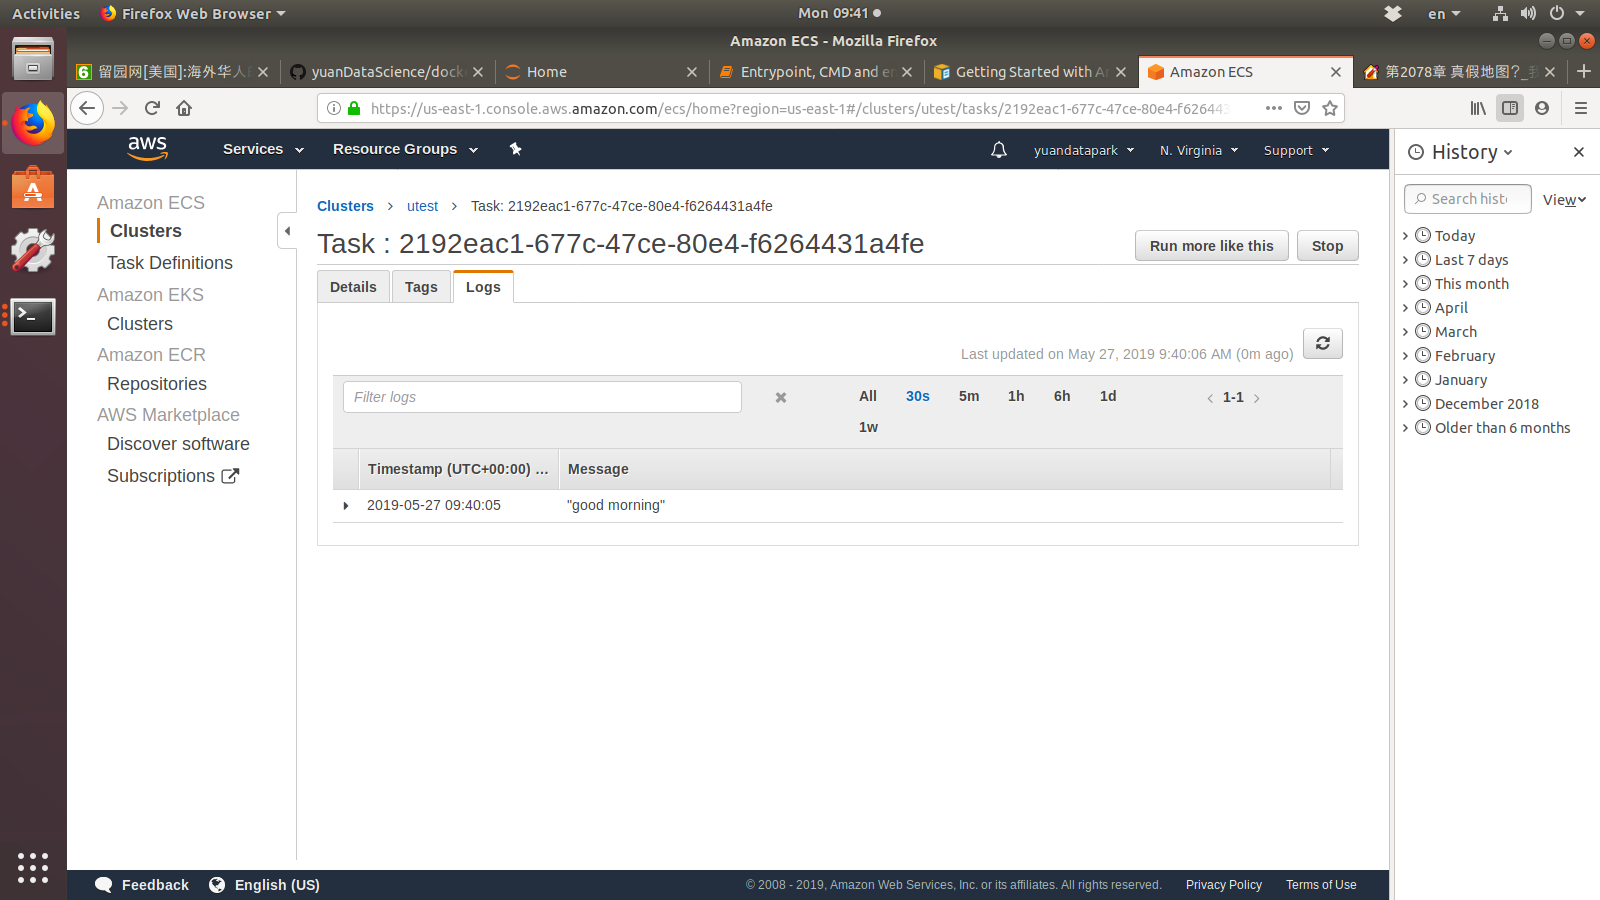
